# Intermediate Pandas : Plotting with Pandas, Matplotlib and Seaborn
#### A short workshop run by the Library Bioinformatics Service

# tinyurl.com/wcmpandas03

Based on the Data Carpentry curriculum for [Data Visualization in Python](http://www.datacarpentry.org/python-ecology-lesson/)
( © Data Carpentry under [Creative Commons Attribution
license](https://creativecommons.org/licenses/by/4.0/) )

---

### Our Data

As for the last lesson, we will be using NCD Risk Factor Collaboration (NDC-RisC)  data, from `Worldwide trends in body-mass index, underweight, overweight, and obesity from 1975 to 2016: a pooled analysis of 2416 population-based measurement studies in 128.9 million children, adolescents, and adults.` [Lancet 2017, published online 11 October 2017](http://www.ncdrisc.org/index.html)

We will be using the adult BMI dataset [country-specific data](http://www.ncdrisc.org/downloads/bmi/NCD_RisC_Lancet_2017_BMI_age_standardised_country.csv) and the height at age 18 [country specific data](http://www.ncdrisc.org/downloads/height/NCD_RisC_eLife_2016_height_age18_countries.csv).

The downloaded filename is `NCD_RisC_Lancet_2017_BMI_age_standardised_country.csv`, but we have saved a simplified version of the file here as `NCD_RisC_bmi.csv`.

The table of arable land (hectares per person) is taken from the [World Bank Databank](https://data.worldbank.org/indicator/AG.LND.ARBL.HA.PC?view=chart)

The table of life expectancy is taken from [our world in data](https://ourworldindata.org/life-expectancy)

---


## Make a line plot of your data

Matplotlib is a Python library that can be used to visualize data. The
toolbox `matplotlib.pyplot` is a collection of functions that make matplotlib
work like MATLAB. In most cases, this is all that you will need to use, but
there are many other useful tools in matplotlib that you should explore.

We will cover a few basic commands for formatting plots in this lesson. A great
resource for help styling your figures is the matplotlib gallery
(http://matplotlib.org/gallery.html), which includes plots in many different
styles and the source code that creates them. The simplest of plots is the 2
dimensional line plot. These examples walk through the basic commands for making
line plots using pyplots.

> ## Challenge - Lots of plots
> Make a variety of line plots from your data. If you are using the streamgage
> data, these could include (1) a hydrograph of the entire month of September
> 2013, (2) the discharge record for the week of the 2013 Front Range flood
> (September 9 through 15), (3) discharge vs. time of day, for every day in the
> record in one figure (Hint: use loops to combine strings and give every line a
> different style and color), and (4) minimum, maximum, and mean daily discharge
> values. Add axis labels, titles, and legends to your figures. Make at least one
> figure with multiple plots using the function `subplot()`.

### Using pyplot:

First, import the pyplot toolbox:

In [2]:
import matplotlib.pyplot as plt

By default, matplotlib will create the figure in a separate window. When using
ipython notebooks, we can make figures appear in-line within the notebook by
writing:

In [11]:
%matplotlib inline

We can start by plotting the values of a list of numbers (matplotlib can handle
many types of numeric data, including numpy arrays and pandas DataFrames - we
are just using a list as an example!):

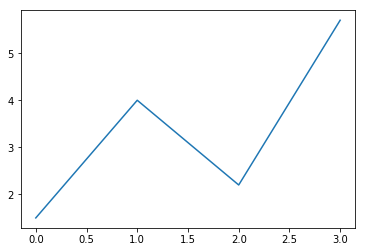

In [4]:
list_numbers = [1.5, 4, 2.2, 5.7]
plt.plot(list_numbers)
plt.show()

The command `plt.show()` prompts Python to display the figure. Without it, it
creates an object in memory but doesn't produce a visible plot. The ipython
notebooks (if using `%matplotlib inline`) will automatically show you the figure
even if you don't write `plt.show()`, but get in the habit of including this
command!

If you provide the `plot()` function with only one list of numbers, it assumes
that it is a sequence of y-values and plots them against their index (the first
value in the list is plotted at `x=0`, the second at `x=1`, etc). If the
function `plot()` receives two lists, it assumes the first one is the x-values
and the second the y-values. The line connecting the points will follow the list
in order:

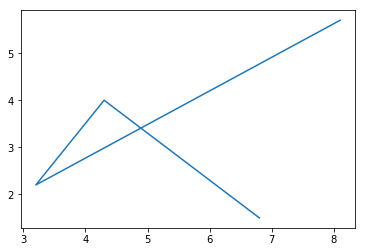

In [5]:
plt.plot([6.8, 4.3, 3.2, 8.1], list_numbers)
plt.show()

A third, optional argument in `plot()` is a string of characters that indicates
the line type and color for the plot. The default value is a continuous blue
line. For example, we can make the line red (`'r'`), with circles at every data
point (`'o'`), and a dot-dash pattern (`'-.'`). Look through the matplotlib
gallery for more examples.

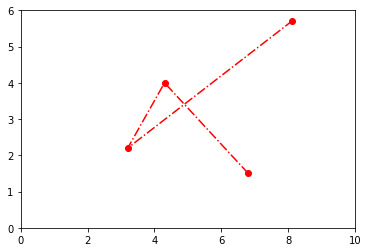

In [6]:
plt.plot([6.8, 4.3, 3.2, 8.1], list_numbers, 'ro-.')
plt.axis([0,10,0,6])
plt.show()

The command `plt.axis()` sets the limits of the axes from a list of `[xmin,
xmax, ymin, ymax]` values (the square brackets are needed because the argument
for the function `axis()` is one list of values, not four separate numbers!).
The functions `xlabel()` and `ylabel()` will label the axes, and `title()` will
write a title above the figure.

A single figure can include multiple lines, and they can be plotted using the
same `plt.plot()` command by adding more pairs of x values and y values (and
optionally line styles):

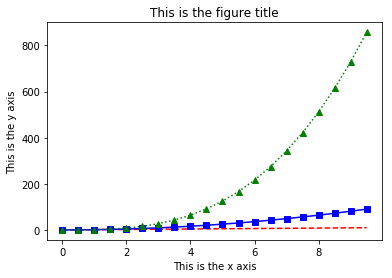

In [7]:
import numpy as np

# Create a numpy array between 0 and 10, with values evenly spaced every 0.5
t = np.arange(0., 10., 0.5)

# Red dashes with no symbols, blue squares with a solid line, and green triangles with a dotted line
plt.plot(t, t, 'r--', t, t**2, 'bs-', t, t**3, 'g^:')

plt.xlabel('This is the x axis')
plt.ylabel('This is the y axis')
plt.title('This is the figure title')

plt.show()


We can include a legend by adding the optional keyword argument `label=''` in
`plot()`. Caution: We cannot add labels to multiple lines that are plotted
simultaneously by the `plt.plot()` command like we did above because Python
won't know to which line to assign the value of the argument label. Multiple
lines can also be plotted in the same figure by calling the `plot()` function
several times:

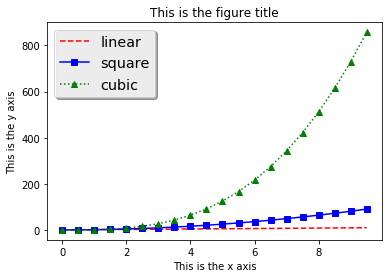

In [8]:
# Red dashes with no symbols, blue squares with a solid line, and green triangles with a dotted line
plt.plot(t, t, 'r--', label='linear')
plt.plot(t, t**2, 'bs-', label='square')
plt.plot(t, t**3, 'g^:', label='cubic')

plt.legend(loc='upper left', shadow=True, fontsize='x-large')

plt.xlabel('This is the x axis')
plt.ylabel('This is the y axis')
plt.title('This is the figure title')

plt.show()

The function `legend()` adds a legend to the figure, and the optional keyword
arguments change its style. By default [typing just `plt.legend()`], the legend
is on the upper right corner and has no shadow.

 The functions `xlabel`, `ylabel`, `title`, `legend`, and many others create text labels. It is good to know that, in addition to the plain text, you may use mathematical notation using a subset of LaTeX language. See [this link](https://matplotlib.org/users/mathtext.html) for more information.


Like MATLAB, pyplot is stateful; it keeps track of the current figure and
plotting area, and any plotting functions are directed to those axes. To make
more than one figure, we use the command `plt.figure()` with an increasing
figure number inside the parentheses:

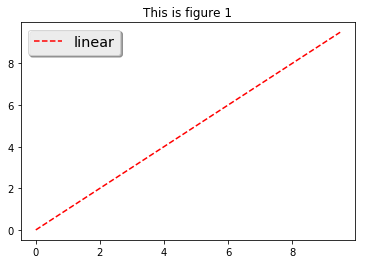

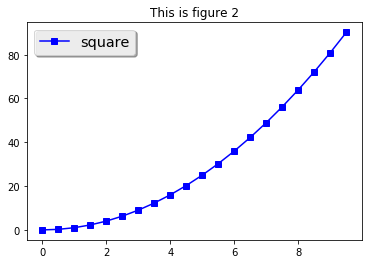

In [12]:
# This is the first figure
plt.figure(1)
plt.plot(t, t, 'r--', label='linear')

plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.title('This is figure 1')

plt.show()

# This is a second figure
plt.figure(2)
plt.plot(t, t**2, 'bs-', label='square')

plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.title('This is figure 2')

plt.show()

A single figure can also include multiple plots in a grid pattern. The
`subplot()` command especifies the number of rows, the number of columns, and
the number of the space in the grid that particular plot is occupying:

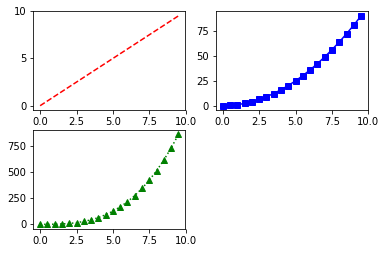

In [10]:
plt.figure(1)

plt.subplot(2,2,1)  # Two row, two columns, position 1
plt.plot(t, t, 'r--', label='linear')

plt.subplot(2,2,2)  # Two row, two columns, position 2
plt.plot(t, t**2, 'bs-', label='square')

plt.subplot(2,2,3)  # Two row, two columns, position 3
plt.plot(t, t**3, 'g^:', label='cubic')

plt.show()

## Make other types of plots:

Matplotlib can make many other types of plots in much the same way that it makes
2 dimensional line plots. Look through the examples in
http://matplotlib.org/users/screenshots.html and try a few of them (click on the
"Source code" link and copy and paste into a new cell in ipython notebook or
save as a text file with a `.py` extension and run in the command line).

> ## Challenge - Final Plot
> Display your data using one or more plot types from the example gallery. Which
> ones to choose will depend on the content of your own data file. If you are
> using the streamgage file, you could make a histogram of the number of days with
> a given mean discharge, use bar plots to display daily discharge statistics, or
> explore the different ways matplotlib can handle dates and times for figures.

# Plotting in Pandas